In [1]:
import pickle

with open('mini_langid_v2.pkl', 'rb') as f:
    langid = pickle.load(f)
    
def get_langs(text):
    return dict(zip(langid.classes_, langid.predict_proba([text])[0]))

In [2]:
base_url = 'http://erziapr.ru'

In [3]:
import requests
import random
import pandas as pd
from bs4 import BeautifulSoup
from tqdm.auto import tqdm, trange
from heapdict import heapdict

In [4]:
downloaded_pages = dict()
urls_queue = {base_url}

In [5]:
for i in trange(1_000_000):
    if not urls_queue:
        break
    url = urls_queue.pop()
    print(url)
    html = requests.get(url).text
    downloaded_pages[url] = html
    soup = BeautifulSoup(html)
    #content = soup.find('div', {'id': 'mw-content-text'})
    #if not content:
    #    continue
    #page_myv_score = get_langs(content.text)['myv']
    #print(page_myv_score)

    for a in soup.findAll('a'):
        if not a.has_attr('href'):
            # skip anchors
            continue
        href = a['href']
        if href.startswith('#'):
            continue
        if not href.startswith('/') and not 'erziapr.ru' in href:
            continue
            
        # print(a['href'])
        
        if href.startswith('/'):
            new_url = base_url + href
        else:
            new_url =  href
            
        
        if new_url not in downloaded_pages:
            urls_queue.add(new_url)
        

  0%|          | 0/1000000 [00:00<?, ?it/s]

http://erziapr.ru
http://erziapr.ru/obshchestvo/syrnen-svadba
http://erziapr.ru/kultura/sanya-vanya-martost-rimas-alkukson-eryamosto-saevks
http://erziapr.ru/obshchestvo/buerintne-eryamo-tarkaks-kochkiz-mordoviyant
http://erziapr.ru/kultura/vastoma-festivales-penzasol
http://erziapr.ru/kultura/molst-kortamotkak-gajgst-morotkak
http://erziapr.ru/kultura/sedejshkavan-kontsert
http://erziapr.ru/obshchestvo/sobytiya-nedeli/evkson-evtneme-alasha-marto
http://erziapr.ru/obshchestvo/sobytiya-nedeli/erva-chis-ushodovi-kulyasto
http://erziapr.ru/obshchestvo/sodaviks-uchjonoj-zhurnalist-raskent-kise-melyavtytsya
http://erziapr.ru/kultura/saranskoev-sakshnos-marina-devyatova-morytsyas
http://erziapr.ru/ekonomika/teven-sodytsya-spetsialisttne-predpriyatiyant-vandyn-chize
http://erziapr.ru/kultura/lembe-jovks-nevtemas-divavty-vanytsyanzo
http://erziapr.ru/natsionalnye-proekty/v-tekushchem-godu-v-mordovii-budut-sozdany-tridtsat-tochek-rosta
http://erziapr.ru/obshchestvo/sobytiya-nedeli/tese-vazhodit

http://erziapr.ru/obshchestvo/sobytiya-nedeli/lazhnytsya-sura-chireste-sjormadej
http://erziapr.ru/zdorove?start=12
http://erziapr.ru/kultura/gajgi-moro-ansamblyan-kontsert
http://erziapr.ru/kultura/mordoviyaso-yutas-animatsionnoj-kinon-festival
http://erziapr.ru/zdorove/tyn-sedejmaritsyat-vesenen-paron-arsitsyat
http://erziapr.ru/obshchestvo/internet-velde-muevit-od-lovnytsyatne
http://erziapr.ru/kultura/kadyk-gajgi-minek-tirin-keles
http://erziapr.ru/ekonomika/boris-adushev-avol-alkukson-yarmakon-teitsyatnen-marto-vetyavi-svalshkan-robota
http://erziapr.ru/obshchestvo/sobytiya-nedeli/obran-enkson-lukoyanova-buese-yutas-erzyan-lismaprya-xi-tse-festivales
http://erziapr.ru/obshchestvo/sobytiya-nedeli/aleksandr-guryanov-minek-velenek-eri
http://erziapr.ru/zdorove/pervyj-v-rossii-antikovidnyj-preparat-na-osnove-mezhdunarodno-priznannoj-molekuly-razrabotan-v-saranske
http://erziapr.ru/kultura/a-stuvtoviks-festival
http://erziapr.ru/obshchestvo/panzhovs-kevrungo
http://erziapr.ru/obshchest

http://erziapr.ru/obshchestvo/sobytiya-nedeli/elena-deryabina-eryaviks-tev-ulems-es-komandan-pelkseks
http://erziapr.ru/obshchestvo/sobytiya-nedeli/artjom-zdunov-meditsinas-vese-eryamon-tev
http://erziapr.ru/
http://erziapr.ru/obshchestvo/sobytiya-nedeli/mordoviyan-od-vajgelt-tevarsevkses-teize-vasentse-eskelksent
http://erziapr.ru/kultura/yutaz-shkadont-apak-soda-ilya-ucho-utsyaskav-eryamo
http://erziapr.ru/kultura/liss-erzyan-dy-mokshon-muzykan-kojtnede-poksh-kniga
http://erziapr.ru/obshchestvo/marina-lyalyatskova-vesemes-iznyavi-buti-uli-charkodema
http://erziapr.ru/obshchestvo/erva-teves-eryaviks
http://erziapr.ru/obshchestvo/sobytiya-nedeli
http://erziapr.ru/obshchestvo/nikolaj-syuvaev-ejshtne-mnnek-syupavchinek
http://erziapr.ru/natsionalnye-proekty?start=988
http://erziapr.ru/kultura/sedejshkavan-pozdorovt-avanen-dy-syre-patyanen
http://erziapr.ru/obshchestvo/sobytiya-nedeli/eryado-sede-kuvat
http://erziapr.ru/obshchestvo/zamestitel-predsedatelya-pravitelstva-ministr-energetiki-

http://erziapr.ru/kultura/yubilejnyj-respublikanskij-festival-konkurs-narodnogo-tvorchestva-shumbrat-mordoviya-projdet-v-munitsipalnykh-rajonakh
http://erziapr.ru/obshchestvo/literaturnaya-stranitsa/kelme-kovos-chokshnen-pert-palsi-modant-ozho-tolso
http://erziapr.ru/kultura/erzyan-vajgel
http://erziapr.ru/obshchestvo/sobytiya-nedeli/erzyan-pravdas-vishka-lovnytsyatnenen-vedteme-aras-eryamo-shumbrat-vishka-lovnytsya
http://erziapr.ru/kultura/jovlan-olon-lems-yavolyavtoz-ies-poladovi
http://erziapr.ru/natsionalnye-proekty/it-spetsialisty-mordovii-priglashayutsya-k-uchastiyu-vo-vserossijskom-konkurse-tsifrovoj-proryv-sezon-iskusstvennyj-intellekt
http://erziapr.ru/kultura/tarazbue-tarazbue-zyardoyak-melsten-a-tui
http://erziapr.ru/natsionalnye-proekty?start=992
http://erziapr.ru/obshchestvo/sobytiya-nedeli/lyudmila-adushkina-ejkakshtne-sekhte-poksh-syupavchinek
http://erziapr.ru/obshchestvo/sobytiya-nedeli/raisa-zorkina-sedeem-sval-karmi-ejden-kuzhoso
http://erziapr.ru/obshchestvo/permez

http://erziapr.ru/kultura/kodamos-eryamon-tev
http://erziapr.ru/obshchestvo/sobytiya-nedeli/mordoviyaso-ushodovs-ejkakshtnenen-yarmakon-pandomas
http://erziapr.ru/obshchestvo/sobytiya-nedeli/vastovoma-shkolan-pryadytsyatnen-marto
http://erziapr.ru/kultura/ejden-kuzhos-koda-lismapryas-kosto-ushodovi-erva-leent-chudemazo
http://erziapr.ru/kultura/feodor-sanaksarskoj-tserkovanten-putst-kupol
http://erziapr.ru/obshchestvo/90-iese-a-vechki-ashteme-tevteme
http://erziapr.ru/obshchestvo/sobytiya-nedeli/tirin-enksos-sekhte-poksh-vechkemam
http://erziapr.ru/obshchestvo/mezhdunarodnaya-nauchno-obshchestvennaya-onlajn-konferentsiya-pamyat-bez-granits-distantsionnye-vozmozhnosti-realizatsii-meropriyatij-posvyashchennykh-75-letiyu-velikoj-pobedy-nad-fashizmom-v-2020-godu-problemy-i-perspektivy
http://erziapr.ru/natsionalnye-proekty/natsionalnyj-proekt-mezhdunarodnaya-kooperatsiya-i-eksport-regionalnyj-proekt-eksport-uslug
http://erziapr.ru/kultura/andrej-anisimov-aktjor-rezhissjor-dy-alkukson-tetya

http://erziapr.ru/obshchestvo/sobytiya-nedeli/sjoksnya-mordoviyasto-armiyav-tuit-malav-700-od-lomant
http://erziapr.ru/kultura/kodat-lemt-maksnest-ansyak-chachoz-ejkakshtnenen-sedikele
http://erziapr.ru/obshchestvo/realizatsiya-v-mordovii-natsionalnykh-proektov-predlozhennykh-prezidentom-rossii-vladimirom-putinym
http://erziapr.ru/natsionalnye-proekty/glava-mordovii-vladimir-volkov-v-svoem-poslanii-upomyanul-prezidenta-rossii-vladimira-putina-25-raz
http://erziapr.ru/zdorove/iyunen-21-tse-chiste-meditsinaso-vazhoditsyan-kenyarkschi
http://erziapr.ru/kultura/erzyan-pravdant-marto-67-iet
http://erziapr.ru/politika/pravitelstvo-rm/eryamost-altyz-tirin-gazetanten-mezde-sjormadst-erzyan-pravdan-zhurnalisttne-ikele
http://erziapr.ru/obshchestvo/sobytiya-nedeli/tavla-trail-chijneman-koryas-vasentse-pelkstamot
http://erziapr.ru/sport/figurnoj-kiryakstneman-koryas-rossiyan-pervenstvas
http://erziapr.ru/kultura/vechkemado-putovksos-kingak-ezize-kado-melteme
http://erziapr.ru/obrazovanie/v-mgu-im

http://erziapr.ru/obshchestvo/sobytiya-nedeli/artjom-zdunov-uznal-chem-gordyatsya-i-na-chto-zhaluyutsya-bolsheignatovtsy
http://erziapr.ru/zdorove?start=120
http://erziapr.ru/obshchestvo/ine-iznyamon-gerojt
http://erziapr.ru/obshchestvo/religiya/alkukson-gerojtne-dy-neen-shkan-ine-tevtne
http://erziapr.ru/obshchestvo/artjom-zdunov-o-peresmotre-raspisaniya-prigorodnykh-elektrichek-komfortnye-poezda-dolzhny-khodit-v-udobnoe-dlya-lyudej-vremya
http://erziapr.ru/obshchestvo/igor-burenkov-prinyal-uchastie-v-s-ezde-natsionalnoj-assotsiatsii-razvitiya-mestnogo-samoupravleniya
http://erziapr.ru/obshchestvo/ejkakshporan-medtanst
http://erziapr.ru/obshchestvo/domashnee-khozyajstvo/tatyana-tolajkina-kudoyurton-mazychis-tejter-avan-teves
http://erziapr.ru/natsionalnye-proekty/prodolzhaetsya-kapitalnyj-remont-kochkurovskoj-polikliniki
http://erziapr.ru/ekonomika/itsyalon-syran-teitsya-predpriyatiyanten-90-iet
http://erziapr.ru/obshchestvo/chadyvedenten-anokt
http://erziapr.ru/obshchestvo/demografiy

http://erziapr.ru/natsionalnye-proekty/natsionalnyj-proekt-maloe-i-srednee-predprinimatelstvo-i-podderzhka-individualnoj-predprinimatelskoj-initsiativy
http://erziapr.ru/kultura/20-letiyu-kanonizatsii-feodora-ushakova-2
http://erziapr.ru/kultura/moskov-jonkson-ejkakshtne-tonavtnit-erzyan-dy-mokshon-rasken-orshamopeltnen
http://erziapr.ru/ekonomika?start=132
http://erziapr.ru/obshchestvo?start=12
http://erziapr.ru/obshchestvo/sobytiya-nedeli?start=48
http://erziapr.ru/obshchestvo/domashnee-khozyajstvo/pchelovody-mordovii-i-penzenskoj-oblasti-proveli-vstrechu
http://erziapr.ru/kultura/syn-kazit-kenyarks-lomantnenen
http://erziapr.ru/kultura/jovlan-olo-erzyan-raskent-kashtanchize
http://erziapr.ru/obshchestvo/onf-v-mordovii-pomog-vozrodit-v-bolsheelkhovskoj-srednej-shkole-yablonevyj-sad
http://erziapr.ru/obshchestvo/vojnas-yutas-vese-semiyatneva
http://erziapr.ru/sport/vladimir-shorchev-keman-respublikasont-spidvees-velmevtevi
http://erziapr.ru/ekonomika/ient-koryas-nevtevkstne-vadryat
ht

http://erziapr.ru/natsionalnye-proekty/natsionalnyj-proekt-maloe-i-srednee-predprinimatelstvo-i-podderzhka-individualnoj-predprinimatelskoj-initsiativy-regionalnyj-proekt-akseleratsiya-sub-ektov-malogo-i-srednego-predprinimatelstva
http://erziapr.ru/politika/molodezhnaya-politika/eryamost-altyz-tirin-gazetanten-mezde-sjormadst-erzyan-pravdan-zhurnalisttne-ikele
http://erziapr.ru/kultura/pingen-pert-bazhi-sodamochitnes
http://erziapr.ru/obshchestvo/meditsinaso-remnjovtnen-vejsen-vazhodemast-65-iet
http://erziapr.ru/politika/podvedeny-itogi-konkursa-detskikh-risunkov-moya-rossiya
http://erziapr.ru/politika/artjom-zdunov-pravitelstvo-rossii-prodolzhaet-prinimat-resheniya-dlya-povysheniya-ustojchivosti-ekonomiki-v-usloviyakh-sanktsij
http://erziapr.ru/obshchestvo/natsionalnyj-proekt-proizvoditelnost-truda-i-podderzhka-zanyatosti-2
http://erziapr.ru/kultura/den-slavyanskoj-pismennosti-i-kultury
http://erziapr.ru/politika/pravitelstvo-rm/artjom-zdunov-poruchenie-prezidenta-po-dostupnosti-ine

http://erziapr.ru/obrazovanie/komanda-mordovii-poluchila-shest-prestizhnykh-nagrad-rossijskoj-studencheskoj-vesny
http://erziapr.ru/kultura/parkos-ojmseman-dy-selmen-kenyardovtytsya-tarka
http://erziapr.ru/obrazovanie?start=8
http://erziapr.ru/natsionalnye-proekty/glava-mordovii-vladimir-volkov-poruchil-reshit-vopros-o-stroitelstve-novykh-shkol-v-saranske
http://erziapr.ru/obshchestvo/dom-gde-sogrevayut-serdtse-i-istselyayut-dushu
http://erziapr.ru/obshchestvo/eryavi-ashtems-kudoso
http://erziapr.ru/kultura/s-novymi-silami-kak-pandemiya-izmenila-uchrezhdeniya-kultury
http://erziapr.ru/natsionalnye-proekty?start=4
http://erziapr.ru/natsionalnye-proekty/zhiteli-trjokh-domov-v-kochkurove-spravili-novosele
http://erziapr.ru/obrazovanie?start=52
http://erziapr.ru/politika/dlya-detej-iz-donbassa-organizovali-katanie-na-attraktsionakh-i-podarili-sladkie-podarki
http://erziapr.ru/kultura/panzhovs-nasledie-kulturan-tonavtneman-shkolas
http://erziapr.ru/kultura/na-stadione-mordoviya-arena-sostoy

http://erziapr.ru/ekonomika/sabancheevskoe-ooo-n-paksyatnese-uryadyt-kukuruzant-dy-lambamo-yaksterkaent
http://erziapr.ru/ekonomika/strategicheskaya-sessiya-moskovskogo-finansovogo-foruma-projdjot-v-onlajn-formate
http://erziapr.ru/politika/krepkaya-semya-v-roddom-saranska-peredali-podarki-dlya-molodykh-mam
http://erziapr.ru/zdorove/livkses-vansttadyz-ekshendyamon-ormatnede
http://erziapr.ru/zdorove?start=72
http://erziapr.ru/kultura/muzees-od-eksponattne-umon-shkan
http://erziapr.ru/obshchestvo/ob-yavlen-priem-rabot-na-konkurs-smirotvorets-2021
http://erziapr.ru/zdorove/obrashchenie-federatsii-nezavisimykh-profsoyuzov-rossii-k-trudyashchimsya-strany
http://erziapr.ru/politika/pravitelstvo-rm/predsedatel-pravleniya-fonda-skolkovo-igor-drozdov-potentsial-u-respubliki-ogromen
http://erziapr.ru/politika/molodezhnaya-politika/v-den-studenta-startoval-ekologicheskij-proekt-vysshaya-shkola-utilizatsii
http://erziapr.ru/politika/pravitelstvo-rm?start=16
http://erziapr.ru/natsionalnye-proekty/

http://erziapr.ru/natsionalnye-proekty/klyuchevoj-printsip-raspredeleniya-sredstv-eto-reshenie-mestnykh-zhitelej
http://erziapr.ru/obshchestvo/sobytiya-nedeli/finnen-ugran-dy-samodijskoj-rasketne-purnavkshnost-vejsen-inekuzhos
http://erziapr.ru/ekonomika/filial-mordovenergo-pristupil-k-realizatsii-remontnoj-programmy-2020-goda
http://erziapr.ru/obshchestvo/anna-maskina-eryamoson-mel-yavan-videchinten
http://erziapr.ru/natsionalnye-proekty?start=904
http://erziapr.ru/politika/sotspodderzhka-povyshenie-bezopasnosti-na-proizvodstvakh-i-uzhestochenie-nakazaniya-dlya-pedofilov-edinaya-rossiya-oboznachila-plany-na-vesennyuyu-sessiyu
http://erziapr.ru/natsionalnye-proekty/dubenskij-rajon-povodimovskoe-selskoe-poselenie-uchastvuet-v-natsproektakh
http://erziapr.ru/obshchestvo?start=36
http://erziapr.ru/natsionalnye-proekty/ruzaevskaya-detskaya-shkola-iskusstv-predostavlyaet-vozmozhnosti-dlya-raskrytiya-tvorcheskogo-potentsiala-molodezhi
http://erziapr.ru/obshchestvo/sobytiya-nedeli/kochkurvele

http://erziapr.ru/kultura/aljoshkan-matrjoshkat-averyanovtnen-vechkeviks-tevest
http://erziapr.ru/obrazovanie?start=80
http://erziapr.ru/obshchestvo/demografiya
http://erziapr.ru/obshchestvo/sobytiya-nedeli/velen-lgotan-koryas-ipotekas-parolgavtsy-eryamo-tarkank
http://erziapr.ru/politika/volontery-organizovali-pokaz-patrioticheskogo-filma-v-punkte-vremennogo-prebyvaniya
http://erziapr.ru/kultura/muzees-sodavty-rasken-istoriyant-marto
http://erziapr.ru/politika/mordoviya-prisoedinitsya-k-vserossijskoj-aktsii-odna-kultura-obshchaya-istoriya
http://erziapr.ru/obshchestvo/kurgonyas-kochkaz-vadryatnen-yutks
http://erziapr.ru/ekonomika?start=28
http://erziapr.ru/zdorove/koronaviruson-koryas-promks
http://erziapr.ru/zdorove/v-khode-realizatsii-regionalnogo-proekta-modernizatsiya-pervichnogo-zvena-zdravookhraneniya-v-selakh-andreevka-novoe-baevo-i-protasovo-bolsheignatovskogo-rajona-nachali-dejstvovat-novye-fapy
http://erziapr.ru/kultura?start=404
http://erziapr.ru/politika?start=1252
http://

http://erziapr.ru/obshchestvo/literaturnaya-stranitsa/salavan-vechkema
http://erziapr.ru/obshchestvo/sobytiya-nedeli/nadezhda-fomina-kadyk-narmunes-livti-vasov
http://erziapr.ru/natsionalnye-proekty/natsionalnyj-proekt-tsifrovaya-ekonomika-regionalnyj-proekt-kadry-dlya-tsifrovoj-ekonomiki
http://erziapr.ru/natsionalnye-proekty/bolsheignatovskij-rajon-remont-dorogi-saransk-romodanovo-b-ignatovo-budet-prodolzhen
http://erziapr.ru/politika/gosudarstvennoe-sobranie-rm/kadety-iz-mordovii-prinyali-uchastie-v-parade-pamyati-v-samare
http://erziapr.ru/obshchestvo/ikh-znaet-vsya-rosiiya/generalos-generalon-veleste
http://erziapr.ru/kultura/tyushtyan-nalksematnen-lezest-od-lomantnen-tryamoso-kastomaso
http://erziapr.ru/obshchestvo/sobytiya-nedeli/valmoron-od-pusmo-vishka-lovnytsyatnenen
http://erziapr.ru/kultura/projdi-dorogami-pamyati-vmeste-s-tits-rm-snimi-video-ekskursiyu-i-vyigraj-poezdku-po-marshrutu-pobeg-iz-ada-mikhail-devyataev
http://erziapr.ru/obshchestvo/artjom-zdunov-novomu-sostavu-o

http://erziapr.ru/kultura/neen-shkane-a-satnyt-vastovomat-koso-gajgi-tirin-keles
http://erziapr.ru/obshchestvo/literaturnaya-stranitsa/aleksandr-tikshajkinen-ledstnemga
http://erziapr.ru/natsionalnye-proekty/zubovo-polyanskij-rajon-rabotaet-mobilnyj-tekhnopark-kvantorium
http://erziapr.ru/kultura/paronzo-pandoms-paroso
http://erziapr.ru/kultura/od-vij
http://erziapr.ru/obrazovanie/ruzaevskie-shkolnye-biblioteki-vpervye-v-mordovii-nachali-elektronnuyu-knigovydachu
http://erziapr.ru/ekonomika/pmef-22-artjom-zdunov-vystupil-na-diskussionnoj-ploshchadke-po-voprosam-razvitiya-otechestvennoj-farmatsevticheskoj-otrasli
http://erziapr.ru/zdorove/kazems-shumbrachi-poksh-utsyaska
http://erziapr.ru/obshchestvo/sobytiya-nedeli/nadezhda-sokolova-lomanes-seste-utsyaskav-zyardo-vechksyz-sonze-dy-zyardo-vechki-sons
http://erziapr.ru/politika/pjotr-koltypin-podderzhka-zhilishchnogo-stroitelstva-v-mordovii-v-fokuse-osobogo-vnimaniya
http://erziapr.ru/obshchestvo/sobytiya-nedeli/vazhodeman-vechkitsya-lom

http://erziapr.ru/ekonomika/triumf-ooo-lvz-saranskij-na-vystavke-zolotaya-osen-2021
http://erziapr.ru/kultura/torama-folkloron-ansamblyan-artisttne-jovtnes-shkinemadost
http://erziapr.ru/obshchestvo/ooo-sabancheevskoe-optimizatsiya-molochnogo-proizvodstva-oblegchila-trud-zhenshchin
http://erziapr.ru/obshchestvo/religiya/ordanbuen-eparkhiyaso-yutavtovst-pelkstamot
http://erziapr.ru/natsionalnye-proekty/v-ministerstve-energetiki-i-zhkkh-mordovii-podveli-itogi-obshcherossijskogo-rejtingovogo-golosovaniya-za-territorii-dlya-blagoustrojstva
http://erziapr.ru/natsionalnye-proekty/glava-mordovii-vladimir-volkov-nasha-zadacha-vojti-v-desyatku-luchshikh-regionalnykh-sistem-obrazovaniya-v-strane
http://erziapr.ru/zdorove/oleg-markin-vijtnen-vejsendyaz-iznyasynek-aparo-ormant
http://erziapr.ru/ekonomika/natsionalnyj-proekt-tsifrovaya-ekonomika-regionalnyj-proekt-tsifrovye-tekhnologii
http://erziapr.ru/obshchestvo/natsionalnyj-proekt-proizvoditelnost-truda-i-podderzhka-zanyatosti
http://erziapr.ru

http://erziapr.ru/kultura/kezeren-kojtnen-vanstomga
http://erziapr.ru/obshchestvo/sobytiya-nedeli/inzhen-vastoman-koj
http://erziapr.ru/kultura/chachoma-chi-marto-2
http://erziapr.ru/politika?start=1276
http://erziapr.ru/ekonomika/artjom-zdunov-obsudil-realizatsiyu-novykh-investitsionnykh-proektov-v-promyshlennosti
http://erziapr.ru/kultura/syrnen-al-festivalenten-anokstamos-poladovi
http://erziapr.ru/sport/altavi-gto-nten
http://erziapr.ru/politika/pravitelstvo-rm/vladimir-volkov-sanitarno-profilakticheskie-mery-na-vozobnovivshikh-rabotu-predpriyatiyakh-dolzhny-soblyudatsya-samym-strozhajshim-obrazom
http://erziapr.ru/politika/pravitelstvo-rm?start=204
http://erziapr.ru/natsionalnye-proekty?start=8
http://erziapr.ru/ekonomika/teshkstyz-es-kenyarkschist
http://erziapr.ru/zdorove?start=84
http://erziapr.ru/natsionalnye-proekty?start=68
http://erziapr.ru/politika/pravitelstvo-rm/vladimir-volkov-vruchil-klyuchi-ot-avtomobilej-skoroj-pomoshchi-i-shkolnykh-avtobusov
http://erziapr.ru/natsio

http://erziapr.ru/politika/pravitelstvo-rm/respublikan-pryavtos-primas-uchastiya-eritsyatnen-tsifrovoj-sermadstomasont
http://erziapr.ru/kultura/mordovskoe-zemlyachestvo-v-moskve-provelo-vecher-pesni-nashej-pobedy
http://erziapr.ru/natsionalnye-proekty/za-tri-goda-v-mordovii-postroeno-785-kilometrov-volokonno-opticheskikh-linij-svyazi
http://erziapr.ru/zdorove/koda-a-noldams-diabetent
http://erziapr.ru/politika/pravitelstvo-rm?start=8
http://erziapr.ru/ekonomika?start=112
http://erziapr.ru/zdorove/pozdravlenie-s-mezhdunarodnym-dnem-meditsinskoj-sestry
http://erziapr.ru/obshchestvo/sobytiya-nedeli/rasken-smi-n-mediaforum
http://erziapr.ru/politika/molodezhnaya-politika/respublika-mordoviya-v-chisle-liderov-po-kolichestvu-finalistov-xixvserossijskogo-konkursa-moya-strana-moya-rossiya
http://erziapr.ru/obshchestvo/sberbank-profinansiruet-stroitelstvo-mnogoetazhnogo-doma-v-zhilom-komplekse-kvartal-v-saranske
http://erziapr.ru/politika/edinaya-rossiya-i-volontery-pobedy-dali-start-aktsii-po

http://erziapr.ru/obshchestvo/studenty-pedagogicheskogo-universiteta-zavoevali-medali-chempionata-rossijskogo-studencheskogo-sportivnogo-soyuza
http://erziapr.ru/politika/gosudarstvennoe-sobranie-rm/natsionalnoj-proekttne-parolgavtsyz-eryamont
http://erziapr.ru/ekonomika/velese-kudon-styavtomas-ipotekant-velde
http://erziapr.ru/politika/edinaya-rossiya-zazhgla-vechnye-ogni-v-mariupole
http://erziapr.ru/obrazovanie/vesemes-yuty-semiyasto
http://erziapr.ru/obshchestvo/ansyak-bibliotekaso-muevi-eryaviks-literatura
http://erziapr.ru/obshchestvo/literaturnaya-stranitsa?start=32
http://erziapr.ru/obshchestvo/dostupnoe-zhile/eryamost-altyz-tirin-gazetanten-mezde-sjormadst-erzyan-pravdan-zhurnalisttne-ikele
http://erziapr.ru/obshchestvo/demografiya/popechitelen-soveten-promks
http://erziapr.ru/kultura/vastovomanten-purnavkshnost-lamo-jondo
http://erziapr.ru/politika/molodezhnaya-politika/natalya-smirnova-iz-mordovii-stala-pobeditelem-konkursa-moya-strana-moya-rossiya-v-spetsialnoj-nominatsii-d

http://erziapr.ru/kultura/irina-nazarova-tejter-avat-vechkede-es-pryank-dy-ulede-sval-mazyeks
http://erziapr.ru/obshchestvo/mon-mordoviyam-proektsent-6-tjozhado-lamo-yavolyavtomat
http://erziapr.ru/obshchestvo/sobytiya-nedeli?start=60
http://erziapr.ru/natsionalnye-proekty/glava-mordovii-vladimir-volkov-poruchil-zakrepit-spetsialistov-dispansernogo-kardiologicheskogo-otdeleniya-za-vsemi-rajonami-respubliki
http://erziapr.ru/zdorove/ob-ekty-zdravookhraneniya-dostupny-dlya-malomobilnykh-grupp-naseleniya
http://erziapr.ru/obshchestvo/sobytiya-nedeli/mordoviyava-yutas-finnen-ugran-tranzites
http://erziapr.ru/obrazovanie/artjom-zdunov-kachestvennoe-i-sbalansirovannoe-pitanie-vazhno-dlya-zdorovya-nashikh-shkolnikov
http://erziapr.ru/obshchestvo/kommunalnye-uslugi-mozhno-oplatit-vo-vsekh-otdeleniyakh-pochty-rossii-v-mordovii
http://erziapr.ru/obshchestvo/sobytiya-nedeli?start=152
http://erziapr.ru/kultura/otkryt-priem-zayavok-na-mezhregionalnyj-festival-patrioticheskoj-pesni-morskaya-dusha-20

http://erziapr.ru/kultura/altazel-mastoron-iditsyatnen-kenyarkschinten
http://erziapr.ru/politika?start=48
http://erziapr.ru/kultura/iznyamon-poezdes-saranskojsel
http://erziapr.ru/politika/pravitelstvo-rm/glava-mordovii-vnes-izmeneniya-v-ukaz-o-merakh-po-protivodejstviyu-koronavirusnoj-infektsii
http://erziapr.ru/obshchestvo/ot-nikh-zavisit-komfort-nashej-zhizni
http://erziapr.ru/politika/molodezhnaya-politika/sergej-kirienko-i-igor-komarov-posetili-final-vserossijskogo-konkursa-dlya-shkolnikov-i-studentov-bolshaya-peremena
http://erziapr.ru/kultura/artjom-zdunov-stepan-erzya-eto-nasha-velikaya-natsionalnaya-gordost
http://erziapr.ru/obshchestvo/sobytiya-nedeli/es-velent-vanstsynek-ansyak-mins
http://erziapr.ru/obshchestvo/artjom-zdunov-i-igor-bukharov-obsudili-razvitie-sfery-gostepriimstva-mordovii
http://erziapr.ru/politika/molodezhnaya-politika/v-saranske-pobediteli-vi-natsionalnogo-chempionata-abilimpiks-poluchili-sertifikaty-na-dopolnitelnoe-obrazovanie-i-priobretenie-tekhnichesk

http://erziapr.ru/obrazovanie/podvedeny-itogi-v-vserossijskogo-konkursa-shkolnaya-proektnaya-olimpiada
http://erziapr.ru/sport/glavnyj-trener-natsionalnoj-sbornoj-rossii-po-plyazhnomu-futbolu-mikhail-likhachev-budu-sam-priezzhat-na-znakovye-matchi-mordovskoj-futbolnoj-ligi
http://erziapr.ru/politika/pravitelstvo-rm/artjom-zdunov-vstretilsya-s-zamestitelem-rukovoditelya-federalnogo-agentstva-po-delam-natsionalnostej-stanislavom-bedkinym
http://erziapr.ru/kultura/eryak-shumbrasto-dy-parste-gennadij-sergeevich
http://erziapr.ru/ekonomika/tekhnopark-mordoviya-nachinaet-priem-zayavok-ot-malogo-i-srednego-biznesa-na-uslugi-po-razvitiyu
http://erziapr.ru/ekonomika/tese-sval-moli-psi-vazhodema
http://erziapr.ru/politika/deputat-otreagirovala-na-zhestokoe-ubijstvo-zhivotnykh-i-podala-zayavlenie-v-politsiyu
http://erziapr.ru/politika/molodezhnaya-politika/od-lomantne-sodavtyz-yalgast-tirin-jonksont-marto
http://erziapr.ru/obshchestvo/eritsyatne-kochkit-parolgavtoman-tarkatnen-2
http://erziapr.ru

http://erziapr.ru/obshchestvo/prodolzhaetsya-priem-zayavok-na-grantovyj-konkurs-v-respublike-mordoviya
http://erziapr.ru/obshchestvo/sobytiya-nedeli?start=164
http://erziapr.ru/natsionalnye-proekty/bolsheignatovskij-rajon-remont-dorogi-saransk-romodanovo-bolshoe-ignatovo-prodolzhaetsya
http://erziapr.ru/kultura?start=68
http://erziapr.ru/ekonomika/artjom-zdunov-o-podgotovke-professionalnykh-metallurgov-na-vkm-stali-obuchenie-kadrov-ne-menee-vazhno-chem-modernizatsiya-proizvodstva
http://erziapr.ru/politika/dmitrij-chernyshenko-i-igor-komarov-obsudili-realizatsiyu-prioritetnykh-proektov-regionov-pfo
http://erziapr.ru/zdorove/teven-vechkitsya-kemeviks-dy-paron-arsitsya
http://erziapr.ru/ekonomika/teplichnoe-ao-n-trudon-kollektives-sekhte-vadryatnen-yutkso
http://erziapr.ru/sport/sval-melsenze-fizkulturas-dy-sportos
http://erziapr.ru/politika/v-penze-igor-burenkov-obsudil-s-zamestitelyami-glav-regionov-pfo-realizatsiyu-strategii-gosudarstvennoj-natsionalnoj-politiki-rf
http://erziapr.ru/o

http://erziapr.ru/politika/pravitelstvo-rm?start=72
http://erziapr.ru/politika/yuliya-ogloblina-6000-vvedennykh-sanktsionnykh-ogranichenij-dlya-rossii-eto-6000-vozmozhnostej
http://erziapr.ru/obrazovanie/ejden-kuzhot-veletnese
http://erziapr.ru/natsionalnye-proekty/insarskij-rajon-dom-kultury-budet-obespechen-avtoklubom-dlya-raboty-v-malonaselennykh-punktakh
http://erziapr.ru/politika?start=1208
http://erziapr.ru/politika/pravitelstvo-rm/glava-mordovii-vladimir-volkov-osmotrel-stroitelstvo-novogo-khirurgicheskogo-korpusa-detskoj-respublikanskoj-bolnitsy
http://erziapr.ru/natsionalnye-proekty/natsionalnyj-proekt-nauka-regionalnyj-proekt-razvitie-nauchnoj-i-nauchno-proizvodstvennoj-kooperatsii
http://erziapr.ru/obshchestvo?start=664
http://erziapr.ru/obshchestvo/literaturnaya-stranitsa?start=40
http://erziapr.ru/zdorove/artjom-zdunov-o-borbe-s-koronavirusom-desyat-munitsipalitetov-respubliki-ostayutsya-v-krasnoj-zone
http://erziapr.ru/politika/pravitelstvo-rm?start=84
http://erziapr.ru/o

http://erziapr.ru/sport/artjom-zdunov-nagradil-bronzovogo-prizera-olimpiady-v-tokio-sergeya-emelina-i-ego-trenera
http://erziapr.ru/politika/pravitelstvo-rm/glava-mordovii-vladimir-volkov-provel-soveshchanie-po-voprosam-lekarstvennogo-obespecheniya
http://erziapr.ru/politika/gosudarstvennoe-sobranie-rm/lezkses-kavkst-paroks-velyavty
http://erziapr.ru/politika/pravitelstvo-rm/opershtab-situatsiya-s-zabolevaemostyu-koronavirusom-v-respublike-ne-uluchshaetsya
http://erziapr.ru/obshchestvo/literaturnaya-stranitsa?start=16
http://erziapr.ru/politika/pravitelstvo-rm/artjom-zdunov-provel-rabochuyu-vstrechu-s-delegatsiej-pao-gazprom
http://erziapr.ru/kultura/kshniste-teez-kaznetne-kenyardovtyt-lomantnen
http://erziapr.ru/politika/pravitelstvo-rm/artem-zdunov-nagradil-pobeditelej-vserossijskogo-konkursa-dlya-shkolnikov-bolshaya-peremena
http://erziapr.ru/natsionalnye-proekty/natsionalnyj-proekt-obrazovanie-regionalnyj-proekt-novye-vozmozhnosti-dlya-kazhdogo
http://erziapr.ru/politika?start=1180

http://erziapr.ru/politika/pravitelstvo-rm?start=40
http://erziapr.ru/obshchestvo/10-ti-letnij-dima-kamodin-na-odin-den-stal-pozharnym
http://erziapr.ru/obshchestvo/biznes-i-nko-regionov-priglashayut-prinyat-uchastie-v-otbore-inklyuzivnykh-praktik-otkryto-dlya-vsekh
http://erziapr.ru/natsionalnye-proekty/natsionalnyj-proekt-maloe-i-srednee-predprinimatelstvo-i-podderzhka-individualnoj-predprinimatelskoj-initsiativy-regionalnyj-proekt-sozdanie-sistemy-podderzhki-fermerov-i-razvitie-selskoj-kooperatsii-2
http://erziapr.ru/politika/pravitelstvo-rm?start=252
http://erziapr.ru/obshchestvo/startoval-tretij-festival-strit-arta-pfo-formart
http://erziapr.ru/sport/v-mordoviyu-privezli-kubok-mira-po-plyazhnomu-futbolu
http://erziapr.ru/obshchestvo/igor-komarov-i-artjom-zdunov-vstretilis-s-pobeditelyami-kadrovogo-proekta-moya-mordoviya
http://erziapr.ru/politika/pravitelstvo-rm/glava-mordovii-vladimir-volkov-prinyal-uchastie-v-soveshchanii-prezidenta-rossii-po-realizatsii-mer-podderzhki-ekonomiki

http://erziapr.ru/natsionalnye-proekty/otdelenie-dnevnogo-prebyvaniya-grazhdan-v-kochkurovskom-rajone-rabotaet-uzhe-bolshe-goda
http://erziapr.ru/kultura?start=348
http://erziapr.ru/natsionalnye-proekty?start=852
http://erziapr.ru/obshchestvo/sobytiya-nedeli/mastyas-sas-teles-yutas
http://erziapr.ru/politika/pravitelstvo-rm/vrio-glavy-mordovii-dlya-zhitelej-poselka-yavas-nuzhno-stroit-novyj-dom-kultury
http://erziapr.ru/natsionalnye-proekty/shkolnikam-rasskazali-o-low-code-platformakh-na-uroke-tsifry
http://erziapr.ru/politika/pravitelstvo-rm/artjom-zdunov-ob-obespechenii-zhilem-detej-sirot-nasha-zadacha-reshit-etu-problemu
http://erziapr.ru/politika/pravitelstvo-rm/glava-mordovii-vladimir-volkov-vstretilsya-s-mitropolitom-saranskim-i-mordovskim-zinoviem
http://erziapr.ru/sport/nikolaj-devyatkin-vechkeviks-robotaso-lomanes-a-sizi
http://erziapr.ru/obshchestvo/sobytiya-nedeli?start=168
http://erziapr.ru/politika/pravitelstvo-rm/artjom-zdunov-provel-rabochuyu-vstrechu-s-chrezvychajnym-i-

http://erziapr.ru/obshchestvo?start=700
http://erziapr.ru/politika/pravitelstvo-rm/artem-zdunov-glavnyj-kriterij-otsenki-raboty-ministrov-nad-natsproektami-sozdanie-novykh-rabochikh-mest
http://erziapr.ru/natsionalnye-proekty/natsionalnyj-proekt-zdravookhranenie-regionalnyj-proekt-razvitie-eksporta-meditsinskikh-uslug
http://erziapr.ru/obshchestvo/olga-kunich-pomogat-lyudyam-blagoe-delo
http://erziapr.ru/politika/pravitelstvo-rm/vrio-glavy-rm-stroitelyam-shkoly-v-novom-mikrorajone-khvatit-govorit-nado-delat
http://erziapr.ru/natsionalnye-proekty?start=824
http://erziapr.ru/politika/edinaya-rossiya-zapustila-partproekt-po-importozameshcheniyu-vybiraj-svoe
http://erziapr.ru/politika/pravitelstvo-rm/artjom-zdunov-provel-vstrechu-s-senatorom-ot-mordovii-petrom-tultaevym
http://erziapr.ru/obshchestvo/sobytiya-nedeli?start=84
http://erziapr.ru/natsionalnye-proekty/elnikovskij-rajon-moksha-stanet-chistoj
http://erziapr.ru/politika/pravitelstvo-rm/glava-mordovii-vladimir-volkov-provel-rabochuy

http://erziapr.ru/politika/pravitelstvo-rm/na-soveshchanii-u-artjoma-zdunova-obsudili-budushchee-regionalnoj-it-industrii
http://erziapr.ru/politika/senator-petr-tultaev-pomogaet-zhitelyam-mordovii-reshat-kommunalnye-problemy
http://erziapr.ru/politika?start=1144
http://erziapr.ru/obshchestvo/bolee-2-tys-zayavok-na-uchastie-v-programme-dogazifikatsii-podali-zhiteli-mordovii
http://erziapr.ru/politika/pravitelstvo-rm/artjom-zdunov-s-rabochej-poezdkoj-pribyl-v-atyashevskij-rajon
http://erziapr.ru/politika?start=112
http://erziapr.ru/kultura?start=104
http://erziapr.ru/politika/pravitelstvo-rm/glava-mordovii-vladimir-volkov-eto-importozameshchenie-samogo-vysokogo-urovnya
http://erziapr.ru/politika?start=1212
http://erziapr.ru/politika/edinaya-rossiya-ob-yavlyaet-sbor-semyan-dlya-zhitelej-donbassa
http://erziapr.ru/politika/pravitelstvo-rm?start=144
http://erziapr.ru/sport/artjom-zdunov-vstretilsya-s-igrokami-futbolnogo-kluba-saransk
http://erziapr.ru/politika/pravitelstvo-rm/glava-mordovi

http://erziapr.ru/obshchestvo?start=72
http://erziapr.ru/politika?start=1176
http://erziapr.ru/natsionalnye-proekty?start=820
http://erziapr.ru/natsionalnye-proekty/chamzinskij-rajon-v-2020-godu-tochki-rosta-otkroyutsya-srazu-v-dvukh-shkolakh
http://erziapr.ru/politika/pravitelstvo-rm/od-ient-dy-roshtovant-kuvalma-mordoviya-respublikan-pryavton-tevtnen-topavtytsyant-a-a-zdunovon-pozdorovonzo
http://erziapr.ru/politika/pravitelstvo-rm/vrio-glavy-mordovii-provel-zasedanie-regionalnogo-opershtaba-po-protivodejstviyu-rasprostraneniyu-koronavirusnoj-infektsii
http://erziapr.ru/politika/pravitelstvo-rm?start=140
http://erziapr.ru/natsionalnye-proekty/lyambirskij-rajon-vedetsya-blagoustrojstvo-dvorov-i-remont-dorog
http://erziapr.ru/obrazovanie/agrarnyj-institut-zhdjot-svoikh-abiturientov
http://erziapr.ru/natsionalnye-proekty/natsionalnyj-proekt-mezhdunarodnaya-kooperatsiya-i-eksport-regionalnyj-proekt-eksport-uslug-respublika-mordoviya
http://erziapr.ru/politika/pravitelstvo-rm/artjom-zduno

http://erziapr.ru/natsionalnye-proekty/natsionalnyj-proekt-maloe-i-srednee-predprinimatelstvo-i-podderzhka-individualnoj-predprinimatelskoj-initsiativy-regionalnyj-proekt-rasshirenie-dostupa-sub-ektov-msp-k-finansovym-resursam-v-tom-chisle-k-lgotnomu-finansirovaniyu-4
http://erziapr.ru/natsionalnye-proekty/park-kultury-i-otdykha-im-v-p-filatova-v-p-romodanovo-ozhidaet-vtoroj-etap-blagoustrojstva
http://erziapr.ru/politika/regionalnoe-otdelenie-partii-pozdravilo-s-dvojnym-prazdnikom-kollektiv-mordovskogo-gosudarstvennogo-natsionalnogo-teatra
http://erziapr.ru/kultura?start=136
http://erziapr.ru/natsionalnye-proekty/natsionalnyj-proekt-tsifrovaya-ekonomika-regionalnyj-proekt-informatsionnaya-bezopasnost-2
http://erziapr.ru/obshchestvo/artjom-zdunov-provel-soveshchanie-po-razvitiyu-passazhirskikh-perevozok-v-rajonakh-respubliki
http://erziapr.ru/politika/pravitelstvo-rm/v-saranske-prokhodit-zasedanie-assotsiatsii-zakonodatelej-privolzhskogo-federalnogo-okruga
http://erziapr.ru/politika/pr

http://erziapr.ru/politika/pravitelstvo-rm?start=108
http://erziapr.ru/kultura?start=260
http://erziapr.ru/politika/partijnyj-proekt-mir-vozmozhnostej-pomozhet-usilit-vospitatelnuyu-rabotu-v-molodezhnoj-srede
http://erziapr.ru/politika/pravitelstvo-rm/artjom-zdunov-itsyalon-jonkssol
http://erziapr.ru/natsionalnye-proekty/ardatovskij-rajon-avtopark-rajonnoj-bolnitsy-popolnilsya-peredvizhnym-fapom
http://erziapr.ru/politika/pravitelstvo-rm/artjom-zdunov-sodavtyze-krasnoslobodskoj-jonksont
http://erziapr.ru/natsionalnye-proekty?start=772
http://erziapr.ru/obshchestvo?start=112
http://erziapr.ru/politika/pravitelstvo-rm/artjom-zdunov-v-rezhime-vks-prinyal-uchastie-v-zasedanii-prezidiuma-gossoveta-i-asi-pod-rukovodstvom-vladimira-putina
http://erziapr.ru/obshchestvo?start=96
http://erziapr.ru/obshchestvo/semiyatnenen-lezdast-granton-yarmaktnen-velde
http://erziapr.ru/politika/edinaya-rossiya-zapuskaet-aktsiyu-po-sboru-i-dostavke-semyan-i-sazhentsev-na-donbass
http://erziapr.ru/politika/v-sa

http://erziapr.ru/obshchestvo/artjom-zdunov-posetil-respublikanskij-mnogofunktsionalnyj-tsentr-predostavleniya-gosudarstvennykh-i-munitsipalnykh-uslug
http://erziapr.ru/natsionalnye-proekty/vostrebovannost-novogo-meditsinskogo-oborudovaniya-rastet
http://erziapr.ru/kultura?start=268
http://erziapr.ru/natsionalnye-proekty/v-ramkakh-natsproekta-obrazovanie-v-kadoshkinskom-rajone-poyavitsya-tochka-rosta
http://erziapr.ru/natsionalnye-proekty/natsionalnyj-proekt-obrazovanie-regionalnyj-proekt-tsifrovaya-obrazovatelnaya-sreda-2
http://erziapr.ru/politika/pravitelstvo-rm/v-mordovii-vystupyat-luchshie-studenty-i-vypuskniki-sankt-peterburgskogo-gosudarstvennogo-instituta-kultury
http://erziapr.ru/politika?start=1140
http://erziapr.ru/natsionalnye-proekty/krasnoslobodskij-rajon-sokhranit-les-pomozhet-novaya-tekhnika
http://erziapr.ru/politika?start=160
http://erziapr.ru/politika/senator-petr-tultaev-podaril-novuyu-obuv-detyam-evakuirovannym-iz-donbassa
http://erziapr.ru/obshchestvo?start=636
ht

http://erziapr.ru/obshchestvo/uvazhaemye-zhiteli-respubliki-mordoviya
http://erziapr.ru/natsionalnye-proekty/remont-dorog-v-rajonakh-mordovii-prodolzhaetsya
http://erziapr.ru/obshchestvo/prostye-pravila-finansovoj-gramotnosti-dlya-detej-i-ikh-roditelej
http://erziapr.ru/natsionalnye-proekty?start=804
http://erziapr.ru/natsionalnye-proekty/ardatovskij-rajon-v-gorodskom-parke-idet-masshtabnyj-remont
http://erziapr.ru/natsionalnye-proekty/bolshebereznikovtsy-golosuyut-za-novyj-oblik-rajtsentra
http://erziapr.ru/natsionalnye-proekty/v-ramkakh-natsproekta-demografiya-mozhno-besplatno-pereobuchitsya-ili-povysit-kvalifikatsiyu
http://erziapr.ru/obshchestvo/kontrol-za-khraneniem-oruzhiya-odna-iz-samykh-vazhnykh-zadach
http://erziapr.ru/natsionalnye-proekty/dubenskij-rajon-obnovlyaetsya-materialno-tekhnicheskaya-baza-shkol
http://erziapr.ru/politika/pravitelstvo-rm/artjom-zdunov-nado-stremitsya-k-tomu-chtoby-kachestvennuyu-meditsinskuyu-pomoshch-kazhdyj-zhitel-respubliki-mog-poluchit-zdes-v-mor

http://erziapr.ru/natsionalnye-proekty?start=740
http://erziapr.ru/natsionalnye-proekty/realizatsiya-regionalnogo-proekta-sokhranenie-lesov-v-2022-godu
http://erziapr.ru/politika/edinaya-rossiya-predstavit-v-pravitelstvo-predlozheniya-iz-regionov-po-modernizatsii-pervichnogo-zvena-zdravookhraneniya
http://erziapr.ru/natsionalnye-proekty?start=664
http://erziapr.ru/natsionalnye-proekty?start=736
http://erziapr.ru/natsionalnye-proekty/v-ardatove-blagodarya-natsproektu-obrazovanie-oborudovana-novaya-masterskaya-dlya-shkolnikov
http://erziapr.ru/obshchestvo/vasen-tarkaso-eritsyatnede-melyavtomas
http://erziapr.ru/kultura?start=248
http://erziapr.ru/natsionalnye-proekty/v-saranske-budut-otremontirovany-avtomobilnye-dorogi-vedushchie-k-sotsialno-znachimym-ob-ektam
http://erziapr.ru/politika/pravitelstvo-rm/artjom-zdunov-minzdravu-neobkhodimo-prinyat-ischerpyvayushchie-mery-dlya-uvelicheniya-propusknoj-sposobnosti-punktov-vaktsinatsii
http://erziapr.ru/politika/v-saranske-sostoyalsya-kruglyj-

http://erziapr.ru/obshchestvo/sber-sozdal-detektor-budushchego-dlya-molodjozhi-v-chest-dnya-studenta
http://erziapr.ru/obshchestvo?start=536
http://erziapr.ru/natsionalnye-proekty?start=784
http://erziapr.ru/politika/pravitelstvo-rm/vrio-glavy-mordovii-provel-soveshchanie-po-privlecheniyu-investitsij-i-sozdaniyu-novykh-rabochikh-mest
http://erziapr.ru/obshchestvo?start=588
http://erziapr.ru/politika?start=1148
http://erziapr.ru/obshchestvo?start=540
http://erziapr.ru/natsionalnye-proekty/regionalnomu-proektu-sotsialnaya-aktivnost-osoboe-vnimanie
http://erziapr.ru/natsionalnye-proekty?start=752
http://erziapr.ru/obshchestvo/valdo-lemenze-ledstnemga
http://erziapr.ru/natsionalnye-proekty/bolnitsa-razvivaetsya-po-programme-modernizatsii-pervichnogo-zvena-zdravookhraneniya
http://erziapr.ru/obshchestvo?start=180
http://erziapr.ru/kultura?start=128
http://erziapr.ru/natsionalnye-proekty?start=716
http://erziapr.ru/kultura?start=124
http://erziapr.ru/politika?start=180
http://erziapr.ru/nats

http://erziapr.ru/politika/v-28-shkole-saranska-proshla-aktsiya-zashchitnikam-otechestva
http://erziapr.ru/politika?start=192
http://erziapr.ru/obshchestvo/fizikas-erzyan-kelse
http://erziapr.ru/obshchestvo?start=520
http://erziapr.ru/politika/v-ardatove-blagoustraivayut-gorodskoj-park
http://erziapr.ru/obshchestvo/kalavtoms-shozhda-ods-stroyams-sede-staka
http://erziapr.ru/politika/vladimir-putin-podpisal-zakon-edinoj-rossii-o-pozhiznennom-zaklyuchenii-dlya-pedofilov
http://erziapr.ru/politika/edinaya-rossiya-predstavila-pervyj-promezhutochnyj-otchet-o-vypolnenii-narodnoj-programmy
http://erziapr.ru/obshchestvo/svojo-mordovskoe-fermery-i-narodnye-umeltsy-predstavyat-svoyu-produktsiyu-na-pervom-regionalnom-festivale
http://erziapr.ru/obshchestvo/respublika-mordoviya-region-vysokoj-prozrachnosti-zakupok
http://erziapr.ru/obshchestvo/glava-mordovii-vladimir-volkov-provel-rabochuyu-vstrechu-s-direktorom-makroregiona-volga-ao-pochta-rossii-aleksandrom-vakulenko
http://erziapr.ru/obshchestv

http://erziapr.ru/natsionalnye-proekty/v-staroshajgovskom-rajone-otremontiruyut-detskuyu-shkolu-iskusstv
http://erziapr.ru/obshchestvo?start=516
http://erziapr.ru/natsionalnye-proekty/v-mordovii-otremontiruyut-respublikanskuyu-detskuyu-muzykalnuyu-shkolu-internat
http://erziapr.ru/obshchestvo/upravlenie-ministerstva-yustitsii-rossijskoj-federatsii-po-respublike-mordoviya-napominaet-poryadok-i-sroki-predostavleniya-ezhegodnoj-otchetnosti-nekommercheskimi-organizatsiyami
http://erziapr.ru/natsionalnye-proekty/natsionalnyj-proekt-zdravookhranenie-regionalnyj-proekt-borba-s-onkologicheskimi-zabolevaniyami-2
http://erziapr.ru/natsionalnye-proekty?start=704
http://erziapr.ru/politika?start=1088
http://erziapr.ru/politika/raskryto-otnoshenie-rossiyan-k-rabote-na-udalenke
http://erziapr.ru/politika/vasilij-piskarev-ispolnil-novogodnyuyu-mechtu-shkolnika-iz-chamzinskogo-rajona-mordovii
http://erziapr.ru/politika?start=1076
http://erziapr.ru/kultura?start=204
http://erziapr.ru/natsionalnye-proek

http://erziapr.ru/natsionalnye-proekty/natsionalnyj-proekt-proizvoditelnost-truda-i-podderzhka-zanyatosti-regionalnyj-proekt-adresnaya-podderzhka-povysheniya-proizvoditelnosti-truda-na-predpriyatiyakh-3
http://erziapr.ru/natsionalnye-proekty/kochkurovskij-rajon-kvantorium-vedjot-v-mir-vysokikh-tekhnologij
http://erziapr.ru/kultura?start=216
http://erziapr.ru/obshchestvo?start=488
http://erziapr.ru/obshchestvo/paros-velyavtozo-paroso
http://erziapr.ru/obshchestvo?start=172
http://erziapr.ru/politika/petr-tultaev-prinyal-uchastie-vo-vserossijskoj-aktsii-elka-zhelanij
http://erziapr.ru/natsionalnye-proekty/v-ramkakh-natsproekta-obrazovanie-v-torbeevskoj-shkole-zarabotala-tochka-rosta
http://erziapr.ru/natsionalnye-proekty/ruzaevskij-rajon-na-baze-tsentralnoj-biblioteki-otkroetsya-biblioeks-press
http://erziapr.ru/natsionalnye-proekty/natsionalnyj-proekt-obrazovanie-regionalnyj-proekt-molodye-professionaly-3
http://erziapr.ru/obshchestvo?start=184
http://erziapr.ru/natsionalnye-proekty/nat

http://erziapr.ru/natsionalnye-proekty/natsionalnyj-proekt-maloe-i-srednee-predprinimatelstvo-i-podderzhka-individualnoj-predprinimatelskoj-initsiativy-regionalnyj-proekt-akseleratsiya-sub-ektov-malogo-i-srednego-predprinimatelstva-4
http://erziapr.ru/natsionalnye-proekty/sotsialno-znachimye-ob-ekty-krasnoslobodskogo-rajona-podklyucheny-k-vysokoskorostnomu-internetu
http://erziapr.ru/natsionalnye-proekty/realizatsiya-natsionalnykh-proektov-v-bolsheignatovskom-rajone
http://erziapr.ru/obshchestvo?start=168
http://erziapr.ru/obshchestvo/na-baze-mordovskogo-respublikanskogo-molodezhnogo-tsentra-otkrylsya-punkt-prijoma-gumanitarnoj-pomoshchi-lyudyam-pribyvayushchim-iz-donetskoj-i-luganskoj-narodnykh-respublik
http://erziapr.ru/obshchestvo/sberbank-profinansiroval-stroitelstvo-doma-v-zhilom-komplekse-amurskij-kvartal-v-khabarovske
http://erziapr.ru/obshchestvo/v-respublike-mordoviya-startovala-vydacha-personalnykh-tsifrovykh-sertifikatov-ot-gosudarstva-na-formirovanie-u-trudosposobnogo-nase

http://erziapr.ru/natsionalnye-proekty/v-2021-godu-v-mordovii-raschistili-9-8-km-reki-moksha
http://erziapr.ru/natsionalnye-proekty/natsionalnyj-proekt-obrazovanie-regionalnyj-proekt-sotsialnye-lifty-dlya-kazhdogo-3
http://erziapr.ru/natsionalnye-proekty/v-teatre-kukol-gotovyat-premeru-na-obnovlennoj-stsene
http://erziapr.ru/natsionalnye-proekty/itogi-realizatsiya-natsionalnykh-proektov-v-torbeevskom-rajone-za-2021-god
http://erziapr.ru/obshchestvo?start=468
http://erziapr.ru/politika/ispolnyayushchim-obyazannosti-glavy-chamzinskogo-rajona-naznachen-ruslan-bateryakov
http://erziapr.ru/natsionalnye-proekty/atyashevskij-rajon-volontery-kultury-vyezzhayut-na-subbotniki-v-pravoslavnye-monastyri
http://erziapr.ru/politika?start=1008
http://erziapr.ru/natsionalnye-proekty/itogi-realizatsii-natsionalnykh-proektov-v-kadoshkinskom-rajone-za-2021-god
http://erziapr.ru/natsionalnye-proekty/plany-realizatsii-regionalnogo-proekta-molodye-professionaly-v-2022-godu
http://erziapr.ru/natsionalnye-proe

http://erziapr.ru/obshchestvo/v-priemnoj-prezidenta-projdjot-goryachaya-liniya
http://erziapr.ru/natsionalnye-proekty/v-romodanovskom-rajone-otremontirovali-detskuyu-shkolu-iskusstv
http://erziapr.ru/obshchestvo/tsifra-v-dele-itogi-pervoj-nedeli-perepisi
http://erziapr.ru/politika/dostupnaya-strana-chto-delaetsya-v-rossii-dlya-sotsialnoj-integratsii-invalidov
http://erziapr.ru/natsionalnye-proekty/v-khode-modernizatsii-pervichnogo-zvena-zdravookhraneniya-vnedryayutsya-metody-distantsionnoj-diagnostiki-i-monitoringa
http://erziapr.ru/natsionalnye-proekty/rekultivatsiya-svalki-v-kovylkinskom-rajone-na-osobom-kontrole-rukovodstva-respubliki
http://erziapr.ru/natsionalnye-proekty/regionalnyj-proekt-formirovanie-sistemy-motivatsii-grazhdan-k-zdorovomu-obrazu-zhizni-vklyuchaya-zdorovoe-pitanie-i-otkaz-ot-vrednykh-privychek-ukreplenie-obshchestvennogo-zdorovya-natsproekta-demografiya
http://erziapr.ru/obshchestvo/nauka-budushchego-kto-stoit-za-peredovymi-issledovaniyami
http://erziapr.ru/poli

http://erziapr.ru/politika?start=252
http://erziapr.ru/natsionalnye-proekty/temnikovskaya-rajonnaya-bolnitsa-uchastvuet-v-realizatsii-regionalnoj-programmy-modernizatsii-zdravookhraneniya
http://erziapr.ru/politika/deputat-yuliya-ogloblina-neobkhodimo-razrabatyvat-novye-mekhanizmy-dlya-stroitelstva-zhilya-na-sele
http://erziapr.ru/obshchestvo/sdelano-s-lyubovyu-i-dushoj
http://erziapr.ru/natsionalnye-proekty/avtomobil-po-programme-modernizatsii-pervichnogo-zvena-zdravookhraneniya
http://erziapr.ru/natsionalnye-proekty/plany-ruzaevskogo-rajona-po-realizatsii-natsionalnykh-proektov-v-2022-godu
http://erziapr.ru/politika/v-mordovii-bolee-100-partijnykh-aktivistov-sdali-krov-i-plazmu-dlya-lyudej-s-tyazhelymi-zabolevaniyami
http://erziapr.ru/natsionalnye-proekty?start=600
http://erziapr.ru/politika/saranske-pochtili-pamyat-pogibshikh-voinov-na-severnom-kavkaze
http://erziapr.ru/politika/edinaya-rossiya-provedet-v-regionakh-prednovogodnie-aktsii
http://erziapr.ru/politika?start=992
http://er

http://erziapr.ru/natsionalnye-proekty/novyj-rentgen-apparat-zarabotal-v-zubovo-polyanskoj-rajonnoj-bolnitse
http://erziapr.ru/natsionalnye-proekty/natsionalnyj-proekt-tsifrovaya-ekonomika-regionalnyj-proekt-kadry-dlya-tsifrovoj-ekonomiki-4
http://erziapr.ru/politika/deputat-gosdumy-yuliya-ogloblina-poblagodarila-vrachej-za-rabotu
http://erziapr.ru/obshchestvo/artjom-zdunov-prinyal-uchastie-v-otkrytii-regionalnogo-otdeleniya-blagotvoritelnogo-fonda-zhenshchiny-za-zhizn
http://erziapr.ru/obshchestvo?start=352
http://erziapr.ru/natsionalnye-proekty?start=264
http://erziapr.ru/natsionalnye-proekty?start=276
http://erziapr.ru/politika/dmitrij-medvedev-pereizbran-predsedatelem-edinoj-rossii-dmitrij-medvedev-pereizbran-predsedatelem-edinoj-rossii
http://erziapr.ru/natsionalnye-proekty/ruzaevskij-rajon-zhiteli-vybirayut-territorii-dlya-blagoustrojstva-v-2022-godu
http://erziapr.ru/obshchestvo?start=408
http://erziapr.ru/obshchestvo/onf-n-kruglovoj-stoles-altavs-shukshon-reformanten
http://erz

http://erziapr.ru/natsionalnye-proekty?start=236
http://erziapr.ru/obshchestvo/vserossijskaya-perepis-naseleniya-2-nedeli-do-starta
http://erziapr.ru/natsionalnye-proekty?start=536
http://erziapr.ru/obshchestvo?start=376
http://erziapr.ru/politika?start=940
http://erziapr.ru/natsionalnye-proekty/natsionalnyj-proekt-demografiya-regionalnyj-proekt-finansovaya-podderzhka-semej-pri-rozhdenii-detej-3
http://erziapr.ru/natsionalnye-proekty/zhitelej-staroshajgovskogo-rajona-pereselyat-iz-avarijnykh-domov-v-novoe-zhile-do-kontsa-goda
http://erziapr.ru/natsionalnye-proekty/v-mordovii-realizuetsya-natsionalnyj-proekt-nauka-i-universitety-2
http://erziapr.ru/politika/turchak-dejstvuyushchaya-konstitutsiya-pozvolila-rossii-vstat-na-put-stabilnogo-razvitiya
http://erziapr.ru/politika/sekretar-mordovskogo-regotdeleniya-partii-edinaya-rossiya-vladimir-chibirkin-provel-priem-grazhdan-po-lichnym-voprosam
http://erziapr.ru/politika?start=288
http://erziapr.ru/obshchestvo?start=356
http://erziapr.ru/nats

http://erziapr.ru/politika/dmitrij-medvedev-nazval-glavnye-zadachi-edinoj-rossii
http://erziapr.ru/obshchestvo/v-respublike-mordoviya-podvedeny-itogi-otsenki-effektivnosti-deyatelnosti-organov-mestnogo-samoupravleniya
http://erziapr.ru/politika/zasluzhennyj-pilot-rossii-otmetil-85-letnij-yubilej
http://erziapr.ru/natsionalnye-proekty/transformatsiya-natsionalnogo-proekta-bezopasnye-kachestvennye-dorogi
http://erziapr.ru/obshchestvo?start=264
http://erziapr.ru/obshchestvo?start=348
http://erziapr.ru/obshchestvo/v-mordovii-aktivno-prokhodit-priem-zayavok-po-programme-dogazifikatsii
http://erziapr.ru/natsionalnye-proekty/v-ruzaevskom-rajone-idet-masshtabnyj-remont-dorog
http://erziapr.ru/natsionalnye-proekty/elnikovskij-rajon-novoe-multimedijnoe-oborudovanie-v-litsee
http://erziapr.ru/obshchestvo?start=300
http://erziapr.ru/natsionalnye-proekty/natsionalnyj-proekt-kultura-regionalnyj-proekt-kulturnaya-sreda-4
http://erziapr.ru/obshchestvo?start=332
http://erziapr.ru/natsionalnye-proekty/k

http://erziapr.ru/natsionalnye-proekty/luchshie-it-kompanii-mordovii-mogut-poluchit-grant-ot-fonda-skolkovo
http://erziapr.ru/politika?start=292
http://erziapr.ru/natsionalnye-proekty/v-mordovii-sozdayutsya-blagopriyatnye-usloviya-raboty-dlya-samozanyatykh
http://erziapr.ru/politika/artjom-zdunov-prinyal-uchastie-v-soveshchanii-u-mikhaila-mishustina
http://erziapr.ru/politika/khinshtejn-edinaya-rossiya-organizuet-sbor-podpisej-v-gorodakh-tsentrakh-oboronnoj-promyshlennosti-dlya-prisvoeniya-zvaniya-gorod-trudovoj-doblesti
http://erziapr.ru/natsionalnye-proekty/natsionalnyj-proekt-kultura-regionalnyj-proekt-tvorcheskie-lyudi-5
http://erziapr.ru/natsionalnye-proekty?start=528
http://erziapr.ru/natsionalnye-proekty/ichalkovskij-rajon-tochki-rosta-budut-sozdany-v-ichalkovskoj-i-b-syresevskoj-shkolakh
http://erziapr.ru/politika/deputat-gosdumy-sergej-chindyaskin-posetil-saranskij-televizionnyj-zavod
http://erziapr.ru/natsionalnye-proekty/natsionalnyj-proekt-zdravookhranenie-mediki-respubliki

http://erziapr.ru/natsionalnye-proekty/romodanovskij-rajon-v-2021-godu-remont-dorog-prodolzhitsya
http://erziapr.ru/politika?start=844
http://erziapr.ru/politika/aktsiya-volontery-donory-projdet-1-dekabrya
http://erziapr.ru/natsionalnye-proekty/v-ardatovskoj-bolnitse-provodyat-uzi-na-novom-oborudovanii
http://erziapr.ru/natsionalnye-proekty/v-mordovii-realizuetsya-regionalnyj-proekt-sistemnye-mery-po-povysheniyu-proizvoditelnosti-truda
http://erziapr.ru/politika/sergej-chindyaskin-pobyval-na-stekolnom-zavode-v-ruzaevke
http://erziapr.ru/politika/deputaty-pozdravlyayut-zhenshchin-kotorye-posvyatili-svoyu-zhizn-vospitaniyu-detej
http://erziapr.ru/politika/aktsiya-dobroe-kino-edinorossy-organizovali-dlya-detej-iz-priyuta-nadezhda-prosmotr-novogodnego-multfilma
http://erziapr.ru/obshchestvo?start=388
http://erziapr.ru/politika/turchak-edinaya-rossiya-sdelaet-dostupnoj-pokupku-lekarstv-v-selskoj-mestnosti
http://erziapr.ru/natsionalnye-proekty/meditsinskaya-reabilitatsiya-osushchestvlyaetsy

http://erziapr.ru/obshchestvo/ledstneman-dy-rizneman-chi
http://erziapr.ru/natsionalnye-proekty/golosovanie-za-obshchestvennuyu-territoriyu
http://erziapr.ru/politika/v-mordovii-nagradili-regionalnykh-pobeditelej-aktsii-diktant-pobedy
http://erziapr.ru/politika/lidery-predvybornogo-spiska-edinoj-rossii-vozglavyat-spetsialno-sozdannye-partijnye-komissii
http://erziapr.ru/politika/turchak-22-aprelya-lyudi-primut-okonchatelnoe-reshenie-o-popravkakh-v-konstitutsiyu
http://erziapr.ru/obshchestvo/kinologon-sluzhbanten-112-iet
http://erziapr.ru/natsionalnye-proekty/mnogoprofilnaya-meditsinskaya-reabilitatsiya-detyam-saranska-i-prilegayushchikh-rajonov-respubliki
http://erziapr.ru/obshchestvo/dlya-aktivistov-kluba-aktivnogo-dolgoletiya-organizovali-besplatnoe-poseshchenie-bassejna
http://erziapr.ru/obshchestvo?start=320
http://erziapr.ru/politika/v-preddverii-novogo-goda-molodogvardejtsy-respubliki-mordoviya-proveli-monitoring-tochek-prodazhi-pirotekhnicheskikh-sredstv-i-novogodnikh-jolok
http

http://erziapr.ru/politika?start=832
http://erziapr.ru/politika/edinaya-rossiya-vnesla-v-gosdumu-zakonoproekt-o-zaprete-na-spisanie-sotsvyplat-za-dolgi
http://erziapr.ru/natsionalnye-proekty?start=464
http://erziapr.ru/politika?start=328
http://erziapr.ru/natsionalnye-proekty/v-bolshebereznikovskom-rajone-blagodarya-natsproektu-blagoustraivayut-park-i-dvory
http://erziapr.ru/politika/edinaya-rossiya-ob-edinyaet-usiliya-s-onf-po-okazaniyu-pomoshchi-lyudyam-v-svyazi-s-pandemiej-koronavirusa
http://erziapr.ru/politika/edinaya-rossiya-edinoglasno-podderzhala-popravki-ob-ispolzovanii-matkapitala-zakon-prinyat
http://erziapr.ru/natsionalnye-proekty/v-sele-ugolok-posle-kapitalnogo-remonta-otkrylsya-dom-kultury
http://erziapr.ru/natsionalnye-proekty/fap-osnova-pervichnogo-zvena-zdravookhraneniya
http://erziapr.ru/politika/ine-iznyamon-yubileenten-anokstamos-vievgavtovi
http://erziapr.ru/natsionalnye-proekty/kovylkinskij-rajon-v-rajtsentre-rabotaet-punkt-prokata-tekhnicheskikh-sredstv-reabilita

http://erziapr.ru/politika/zhiteli-lyambirkogo-rajona-poprosili-vitaliya-efimova-pomoch-s-remontom-i-stroitelstvom-dorog
http://erziapr.ru/natsionalnye-proekty/natsionalnyj-proekt-tsifrovaya-ekonomika-regionalnyj-proekt-informatsionnaya-infrastruktura-3
http://erziapr.ru/natsionalnye-proekty/detskaya-poliklinika-1-v-saranske-uchastvuet-v-natsproekte-zdravookhranenie
http://erziapr.ru/politika?start=344
http://erziapr.ru/politika/edinaya-rossiya-i-volontery-pobedy-ob-edinyat-usiliya-po-okazaniyu-pomoshchi-veteranam-i-chlenam-ikh-semej-v-svyazi-s-pandemiej-koronavirusa
http://erziapr.ru/politika/turchak-edinaya-rossiya-vnesla-v-gosdumu-zakonoproekt-o-narodnom-byudzhetirovanii
http://erziapr.ru/politika/gosduma-okonchatelno-prinyala-zakonoproekt-edinoj-rossii-sovershenstvuyushchij-deyatelnost-snt
http://erziapr.ru/politika/viktor-kidyaev-peredal-mordovskim-medikam-sredstva-zashchity-ot-infektsii
http://erziapr.ru/politika/andrej-turchak-pyatyj-nomer-simvoliziruet-pyaterku-s-kotoroj-edinay

http://erziapr.ru/politika/medvedev-partijnaya-infrastruktura-dolzhna-perejti-na-rezhim-volonterstva-i-okazaniya-lyudyam-neobkhodimoj-pomoshchi
http://erziapr.ru/natsionalnye-proekty/multimedia-gidy-s-dopolnennoj-realnostyu-vystavochnye-proekty-muzeya-im-s-d-erzi
http://erziapr.ru/politika?start=828
http://erziapr.ru/politika/volonter-po-prizvaniyu
http://erziapr.ru/natsionalnye-proekty/v-mordovii-realizuetsya-regionalnyj-proekt-sokhranenie-lesov-2
http://erziapr.ru/natsionalnye-proekty?start=368
http://erziapr.ru/natsionalnye-proekty?start=364
http://erziapr.ru/natsionalnye-proekty/zhiteli-mordovii-prokhodyat-professionalnoe-obuchenie-v-ramkakh-proekta-sodejstvie-zanyatosti
http://erziapr.ru/natsionalnye-proekty/natsionalnyj-proekt-zdravookhranenie-regionalnyj-proekt-razvitie-detskogo-zdravookhraneniya-vklyuchaya-sozdanie-sovremennoj-infrastruktury-okazaniya-meditsinskoj-pomoshchi-detyam-4
http://erziapr.ru/natsionalnye-proekty?start=444
http://erziapr.ru/politika/za-dva-mesyatsa-rabo

http://erziapr.ru/politika/zakon-o-pravilakh-gosudarstvennogo-i-munitsipalnogo-nadzora-prinyat-v-pervom-chtenii
http://erziapr.ru/politika?start=756
http://erziapr.ru/politika/edinaya-rossiya-napravit-prezidentu-predlozheniya-po-podderzhke-predprinimatelej-i-rabotnikov-predpriyatij-biznesa-2
http://erziapr.ru/politika/v-kovylkinskom-rajone-sostoyalas-patrioticheskaya-aktsiya-po-uborke-pamyatnika-pavshim-voinam
http://erziapr.ru/politika/edinaya-rossiya-uchebnyj-god-v-shkolakh-nachnetsya-1-sentyabrya-v-ochnom-formate
http://erziapr.ru/politika/dmitrij-medvedev-za-kazhdym-problemnym-voprosom-stoit-konkretnyj-chelovek
http://erziapr.ru/natsionalnye-proekty?start=432
http://erziapr.ru/natsionalnye-proekty/pervichnoe-zveno-zdravookhraneniya-osnova-vsej-sistemy-meditsinskoj-pomoshchi
http://erziapr.ru/politika/v-mordovii-prokhodit-aktsiya-lentochka-trikolor
http://erziapr.ru/politika/vybory-deputatov-gosudarstvennoj-dumy-federalnogo-sobraniya-rossijskoj-federatsii-vosmogo-sozyva
http://erzia

http://erziapr.ru/natsionalnye-proekty/v-rp-komsomolskij-prodolzhaetsya-realizatsiya-proekta-formirovanie-komfortnoj-gorodskoj-sredy
http://erziapr.ru/natsionalnye-proekty/zaklyucheno-soglashenie-o-realizatsii-regionalnogo-proekta-chistaya-strana-natsionalnogo-proekta-ekologiya
http://erziapr.ru/politika/v-saransk-pribyli-s-vizitom-predstaviteli-voenno-morskikh-sil-indii
http://erziapr.ru/natsionalnye-proekty/zhiteli-respubliki-mordoviya-mogut-osvoit-novuyu-professiyu-v-sfere-tsifrovoj-ekonomiki-pri-finansovoj-podderzhke-gosudarstva
http://erziapr.ru/natsionalnye-proekty?start=388
http://erziapr.ru/natsionalnye-proekty/v-ichalkovskuyu-tsrb-postupil-novyj-avtomobil
http://erziapr.ru/politika/initsiativu-edinoj-rossii-o-bezopasnykh-vyborakh-podderzhali-pyat-politicheskikh-partij
http://erziapr.ru/politika/v-saranske-uchastnikam-velikoj-otechestvennoj-vojny-vruchayut-mobilnye-telefony
http://erziapr.ru/natsionalnye-proekty/v-bolshebereznikovskom-rajone-sozdayutsya-usloviya-dlya-razvitiya-

http://erziapr.ru/politika/gosudarstvennyj-teatr-kukol-nachal-repetitsii-spektaklya-o-fedote-sychkove
http://erziapr.ru/politika?start=368
http://erziapr.ru/politika/andrej-turchak-byudzhet-poluchilsya-sbalansirovannym-i-napravlen-na-zabotu-o-lyudyakh-ikh-zashchitu-i-blagopoluchie
http://erziapr.ru/politika/edinaya-rossiya-v-slozhnykh-usloviyakh-reshala-vazhnejshie-dlya-strany-i-lyudej-zadachi-dmitrij-medvedev
http://erziapr.ru/natsionalnye-proekty?start=396
http://erziapr.ru/politika/v-oktyabre-v-mordovii-provoditsya-aktsiya-teplye-okna
http://erziapr.ru/politika?start=700
http://erziapr.ru/natsionalnye-proekty/s-1-iyulya-v-mordovii-otkrylis-eshche-pyat-otdelenij-dnevnogo-prebyvaniya
http://erziapr.ru/politika?start=376
http://erziapr.ru/politika?start=396
http://erziapr.ru/politika/v-respublike-snizilis-tseny-na-produkty-borshchevogo-nabora
http://erziapr.ru/politika/zhitelnitsa-mordovii-obratilas-k-aleksandru-vorobevu-s-problemoj-prisvoeniya-zvaniya-veteran-truda
http://erziapr.ru/p

http://erziapr.ru/natsionalnye-proekty/natsionalnyj-proekt-mezhdunarodnaya-kooperatsiya-i-eksport-regionalnyj-proekt-eksport-produktsii-apk-5
http://erziapr.ru/politika/pobeda-v-konkurse-dala-vozmozhnost-priobresti-orgtekhniku-i-neobkhodimuyu-apparaturu-saranskomu-shkolnomu-muzeyu
http://erziapr.ru/politika/sostoyalsya-kruglyj-stol-po-razvitiyu-nekommercheskogo-sektora-respubliki
http://erziapr.ru/politika/artjom-zdunov-zalozhil-novuyu-traditsiyu-v-den-goroda-obsuzhdat-s-zhitelyami-saranska-plany-po-blagoustrojstvu
http://erziapr.ru/politika?start=404
http://erziapr.ru/politika/volontery-dostavili-korm-v-priyut-dlya-beznadzornykh-zhivotnykh
http://erziapr.ru/politika/edinaya-rossiya-za-pyat-let-vypolnila-predvybornuyu-programmu-v-sfere-obrazovaniya-i-zdravookhraneniya
http://erziapr.ru/politika/deputat-gosdumy-sergej-chinyadskin-predostavil-mashinu-uchastkovym-respublikanskoj-bolnitsy-5
http://erziapr.ru/politika?start=408
http://erziapr.ru/politika/volonterskij-tsentr-prodolzhaet-svoy

http://erziapr.ru/politika/edinorossy-mordovii-prinyali-uchastie-vo-vserossijskoj-blagotvoritelnoj-aktsii-podari-rebenku-knigu
http://erziapr.ru/politika/eksperty-it-otrasli-sistema-predvaritelnogo-golosovaniya-edinoj-rossii-nadezhno-zashchishchena
http://erziapr.ru/politika/sergej-chindyaskin-pomozhet-pedagogu-iz-saranska-vyjti-na-dosrochnuyu-pensiyu
http://erziapr.ru/politika/na-vybory-v-gosdumu-edinaya-rossiya-namerena-serezno-obnovit-sostav-kandidatov
http://erziapr.ru/politika/andrej-turchak-edinaya-rossiya-provedet-s-ezd-v-dva-etapa
http://erziapr.ru/politika/edinaya-rossiya-zapuskaet-kadrovyj-proekt-dlya-otbora-kandidatov-na-vybory-v-gosdumu
http://erziapr.ru/politika/v-saranske-v-den-narodnogo-edinstva-vozlozheny-tsvety-k-monumentu-naveki-s-rossiej
http://erziapr.ru/natsionalnye-proekty/v-zubovo-polyanskom-rajone-vozrozhdayut-kulturnye-traditsii
http://erziapr.ru/politika/v-mordovii-v-den-pobedy-prodolzhaetsya-aktsiya-georgievskaya-lentochka
http://erziapr.ru/politika?start=616

http://erziapr.ru/politika/v-oktyabrskom-rajone-prokhodit-aktsiya-sad-pamyati
http://erziapr.ru/politika/vasilij-piskarev-pozdravil-veteranov-s-dnem-velikoj-pobedy
http://erziapr.ru/politika?start=448
http://erziapr.ru/politika/deputat-gossobraniya-rm-rinat-raimov-dostavil-v-respublikanskuyu-bolnitsu-4-pitevuyu-vodu
http://erziapr.ru/politika/zashchita-prav-pensionerov-narusheniya-trudovogo-zakonodatelstva-podderzhka-pedagogov-dmitrij-medvedev-provel-priem-grazhdan
http://erziapr.ru/politika/andrej-turchak-edinaya-rossiya-prodolzhit-sledit-za-situatsiej-s-dostupnostyu-lekarstv-i-prinimat-mery-v-sluchae-vozniknoveniya-problem
http://erziapr.ru/politika?start=440
http://erziapr.ru/politika/deputat-gossobraniya-rm-rinat-raimov-i-glava-dubenskogo-rajona-viktor-nefedov-proveli-rejd-po-nalichiyu-lekarstvennykh-preparatov-v-aptekakh
http://erziapr.ru/politika/edinaya-rossiya-predlozhila-sdelat-postoyannymi-minimalnye-vyplaty-po-bolnichnym-na-urovne-ne-nizhe-mrot
http://erziapr.ru/politika/v-p

http://erziapr.ru/politika/edinaya-rossiya-29-aprelya-provedet-diktant-pobedy-na-16-tysyachakh-ploshchadok-v-80-stranakh-mira
http://erziapr.ru/politika/edinaya-rossiya-predlozhila-sdelat-31-dekabrya-vykhodnym-dnem-vo-vsekh-regionakh-strany
http://erziapr.ru/politika/deputat-gossobraniya-rm-sergej-vdovin-peredal-sredstva-individualnoj-zashchity-volonterskomu-tsentru
http://erziapr.ru/politika/podvedeny-itogi-realizatsii-proekta-edinoj-rossii-kultura-maloj-rodiny-v-regione
http://erziapr.ru/politika?start=604
http://erziapr.ru/politika/aktivisty-volonterskogo-tsentra-edinoj-rossii-i-molodogvardejtsy-mordovii-proveli-aktsiyu-pamyat
http://erziapr.ru/politika/artjom-zdunov-poblagodaril-kollektiv-kujbyshevskoj-zheleznoj-dorogi-za-sotrudnichestvo
http://erziapr.ru/politika/vrio-glavy-mordovii-artjom-zdunov-provel-rabochee-soveshchanie-po-voprosam-razvitiya-zavoda-lisma
http://erziapr.ru/politika/artjom-zdunov-obsudil-s-glavoj-gorodskogo-okruga-saransk-blagoustrojstvo-obshchestvennykh-territ

http://erziapr.ru/politika/vtoroj-sotsialnyj-onlajn-forum-edinoj-rossii-volontery-predlozhili-novye-mery-pomoshchi-veteranam-pensioneram-i-detyam-s-invalidnostyu
http://erziapr.ru/politika/v-mordovii-3200-chelovek-primut-uchastie-v-diktante-pobedy
http://erziapr.ru/politika/v-federalnyj-orgkomitet-predvaritelnogo-golosovaniya-edinoj-rossii-vojdut-obshchestvenniki
http://erziapr.ru/politika/edinaya-rossiya-zapuskaet-obshchestvennyj-monitoring-stroitelstva-sportivnykh-ob-ektov-v-regionakh
http://erziapr.ru/politika/edinaya-rossiya-podnyala-vopros-spravedlivoj-oplaty-truda-medikov-v-krasnoj-zone-v-novogodnie-prazdniki
http://erziapr.ru/politika/desyatki-tysyach-lyudej-prisoedinilis-k-aktsii-edinoj-rossii-i-volonterskikh-ob-edinenij-zashchitim-pamyat-geroev
http://erziapr.ru/politika/nikolaj-kruchinkin-dlya-vrio-glavy-respubliki-net-melochej
http://erziapr.ru/politika/domovoj-pomog-shkolnikam-razobratsya-v-kommunalnykh-uslugakh
http://erziapr.ru/politika/v-saranske-volontery-organizovali-b

In [6]:
parsed_pages = []

for url in tqdm(downloaded_pages):
    if '?start=' in url:
        continue
    html = downloaded_pages[url]
    soup = BeautifulSoup(html)
    try:
        title = soup.find('div', {'class': 'page-header'}).text.strip()
        category = soup.find('dd', {'class': 'category-name'}).find('a').text
        body = soup.find('div', {'itemprop': 'articleBody'}).text
    except AttributeError:
        print(url)
        continue
    parsed_pages.append({
        'url': url,
        'title': title, 
        'category': category,
        'body': body,
        'myv_score': get_langs(body)['myv']
    })

  0%|          | 0/5169 [00:00<?, ?it/s]

http://erziapr.ru
http://erziapr.ru/?view=article&id=2286:roman-khajrov-osnovnaya-nasha-zadacha-sokhranit-dostupnost-obrazovaniya-dlya-talantlivykh-vypusknikov-respubliki&catid=32:reklama
http://erziapr.ru/obshchestvo/eryamost-altyz-tirin-gazetanten-mezde-sjormadst-erzyan-pravdan-zhurnalisttne-ikele
http://erziapr.ru/obshchestvo/domashnee-khozyajstvo
http://erziapr.ru/obshchestvo/demografiya/roman-khajrov-osnovnaya-nasha-zadacha-sokhranit-dostupnost-obrazovaniya-dlya-talantlivykh-vypusknikov-respubliki
http://erziapr.ru/obshchestvo/sobytiya-nedeli/eryamost-altyz-tirin-gazetanten-mezde-sjormadst-erzyan-pravdan-zhurnalisttne-ikele
http://erziapr.ru/zdorove
http://erziapr.ru/zdorove/roman-khajrov-osnovnaya-nasha-zadacha-sokhranit-dostupnost-obrazovaniya-dlya-talantlivykh-vypusknikov-respubliki
http://erziapr.ru/obshchestvo/sobytiya-nedeli/roman-khajrov-osnovnaya-nasha-zadacha-sokhranit-dostupnost-obrazovaniya-dlya-talantlivykh-vypusknikov-respubliki
http://erziapr.ru/kultura/roman-khajrov

In [7]:
print(len(parsed_pages))

4008


In [8]:
df = pd.DataFrame(parsed_pages)

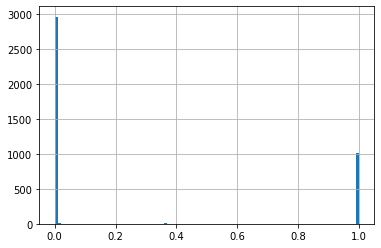

In [9]:
df.myv_score.hist(bins=100);

In [10]:
df[df.myv_score>0.5].shape

(1020, 5)

In [11]:
df[df.myv_score>0.5].sample(10)

,url,title,category,body,myv_score
914,http://erziapr.ru/kultura/purnaz-erzyan-dy-mok...,Пурназь эрзянь ды мокшонь раськень исполкомон...,Культура,\nПецясто Мордовиянь раськень театрасо ютась Э...,1.0
688,http://erziapr.ru/obshchestvo/literaturnaya-st...,Ледстнемат,Литературная страница,\nТе ульнесь 1999 иень сундерьков. Мон сестэ т...,1.0
11,http://erziapr.ru/kultura/lembe-jovks-nevtemas...,«Лембе ёвкс» невтемась дивавты ваныцянзо,Культура,\nЭрзянь ды мокшонь раськень культурань музейс...,1.0
444,http://erziapr.ru/obshchestvo/sobytiya-nedeli/...,TAVLA TRAIL – чийнемань коряс васенце пелькстамот,События недели,"\n\nНедлячистэ, медьковонь 11-це чистэ, Вирь Т...",1.0
194,http://erziapr.ru/politika/pravitelstvo-rm/vla...,Владимир Волков содавтынзе Чаунзань ды Отяжбуе...,Правительство РМ,\nПондельникстэ Мордовиянь Прявтось Владимир В...,1.0
1270,http://erziapr.ru/sport/altavi-gto-nten,АЛТАВИ ГТО-нтень,Спорт,\nАцамковонь 7-це чистэ ушодовсь «Неделя ГТО» ...,1.0
2163,http://erziapr.ru/obshchestvo/ejkakshtnen-zyya...,ЭЙКАКШТНЕНЬ ЗЫЯНТНЭДЕ ВАНСТОМГА,Общество,\nНеть читнестэ республикань МВД-сэ ютавтовсь ...,1.0
424,http://erziapr.ru/obshchestvo/sobytiya-nedeli/...,Чукалонь «Эрзянь аватне» пек учить од Культура...,События недели,\nОрданьбуень Чукало эрзянь велесь сравтовсь п...,1.0
1136,http://erziapr.ru/zdorove/artjom-zdunov-korona...,Артём Здунов – коронавирусонь каршо бороцямодо...,Здоровье,\nМордовиянь Прявтонть тевтнень топавтыцясь Ар...,1.0
1078,http://erziapr.ru/obshchestvo/sobytiya-nedeli/...,«ТОРАМА – МУЗЫКАСЬ ВЕСЕ ШКАТНЕС»,События недели,\nМартонь 24-це чистэ Чувашиянь государственно...,1.0


In [12]:
df[df.myv_score>0.5].to_csv('other_sources/erzya_pravda.tsv', sep='\t', index=None)